In [1]:
%pip install pandas scikit-learn matplotlib


  Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
  Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.43.1-cp311-cp311-win_amd64.whl.metadata (155 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata (9.6 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl (480 kB)
Using cached cyc

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv(r'C:\Users\jessi\OneDrive\1 Projects\1-svts\data\interim\EURUSD_M1.csv')

In [20]:
df_cluster = df.drop(['DateTime'], axis=1)

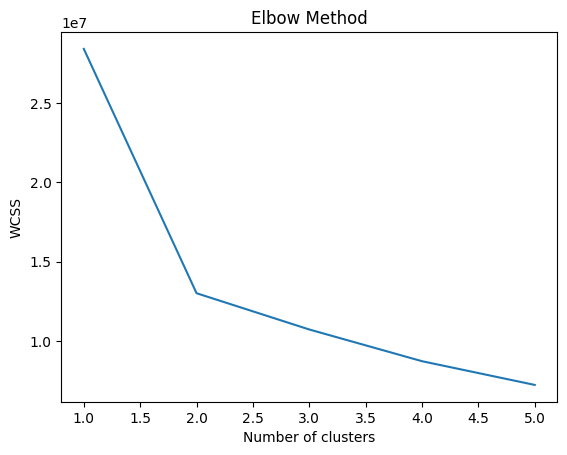

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample OHLCV and spread data


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_cluster)

# Elbow method to find the best k
wcss = []  # within-cluster sum of squares
for i in range(1, 6):  # Adjust the range based on your data
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the best k and fit the model
best_k = 3  # Replace this based on your observation from the elbow graph
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_df)

# Add cluster label to the original data
df_cluster['Cluster'] = pred_y


In [18]:
df['Cluster'].value_counts()

Cluster
0    3196534
1    1459311
2      80025
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Sample OHLC data
df = pd.read_csv(r'C:\Users\jessi\OneDrive\1 Projects\1-svts\data\interim\EURUSD_M1.csv')

# Initialize empty list to store candle types
candle_types = []

# Loop through DataFrame to classify candles
for i, row in df.iterrows():
    open, high, low, close = row['Open'], row['High'], row['Low'], row['Close']
    body_size = abs(open - close)
    upper_wick = abs(high - max(open, close))
    lower_wick = abs(min(open, close) - low)
    full_size = high - low
    
    if close > open:
        wick_percentage = ((upper_wick + lower_wick) / full_size) * 100
        if wick_percentage <= 20:
            candle_types.append('Bullish Marubozu')
        else:
            candle_types.append('Bullish')
    elif close < open:
        wick_percentage = ((upper_wick + lower_wick) / full_size) * 100
        if wick_percentage <= 20:
            candle_types.append('Bearish Marubozu')
        else:
            candle_types.append('Bearish')
    else:
        candle_types.append('Neutral')

# Add candle types to DataFrame
df['Candle_Type'] = candle_types

df


In [6]:
import os
project_folder_path = r'c:\Users\jessi\OneDrive\1 Projects\1-svts'  # replace with your actual path

# Change the current working directory
os.chdir(project_folder_path)


In [16]:
data_set.fetch_news_sentiment_data()

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label,time_published(est)
0,FOREX:USD,0.047147,-0.21182,Somewhat-Bearish,2022-02-28 19:02:02-05:00
1,FOREX:USD,0.100252,-0.506365,Bearish,2022-03-01 03:00:00-05:00
2,FOREX:USD,0.121312,-0.544853,Bearish,2022-03-01 03:00:00-05:00
3,FOREX:USD,0.041886,-0.171861,Somewhat-Bearish,2022-03-01 03:00:00-05:00
4,FOREX:USD,0.04876,-0.631514,Bearish,2022-03-01 03:00:00-05:00
...,...,...,...,...,...
715,FOREX:USD,0.111488,-0.144674,Neutral,2022-03-22 02:26:16-04:00
716,FOREX:USD,0.131823,-0.144674,Neutral,2022-03-22 02:26:16-04:00
717,FOREX:USD,0.055403,-0.002793,Neutral,2022-03-22 02:26:16-04:00
718,FOREX:USD,0.093289,-0.134357,Neutral,2022-03-22 02:26:16-04:00


In [10]:
from src.utils import data_source

data_set = data_source.FinancialAnalytics()

data_set.cluster_data()

TypeError: FinancialAnalytics.cluster_data() missing 1 required positional argument: 'file_path'